In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../plant_growth_data.csv')
df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861
1,sandy,4.033133,weekly,organic,28.919484,52.422276
2,loam,8.892769,bi-weekly,none,23.179059,44.660539
3,loam,8.241144,bi-weekly,none,18.465886,46.433227
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923
...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000
189,clay,7.528000,weekly,chemical,30.500000,60.100000
190,loam,4.934000,bi-weekly,none,24.500000,61.700000
191,sandy,8.273000,daily,organic,27.900000,69.500000


## Visulaization

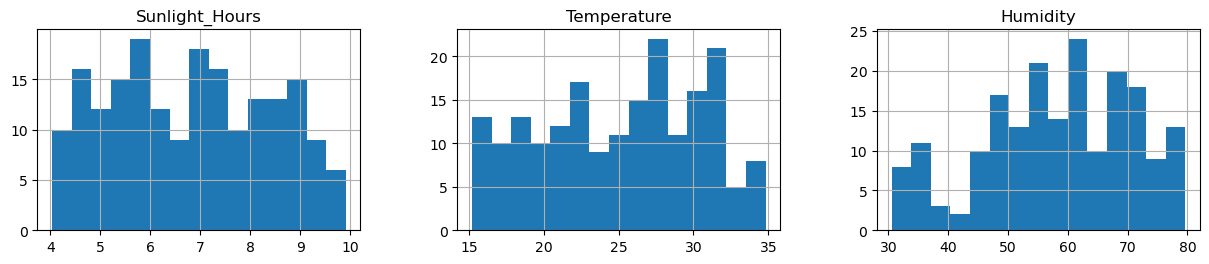

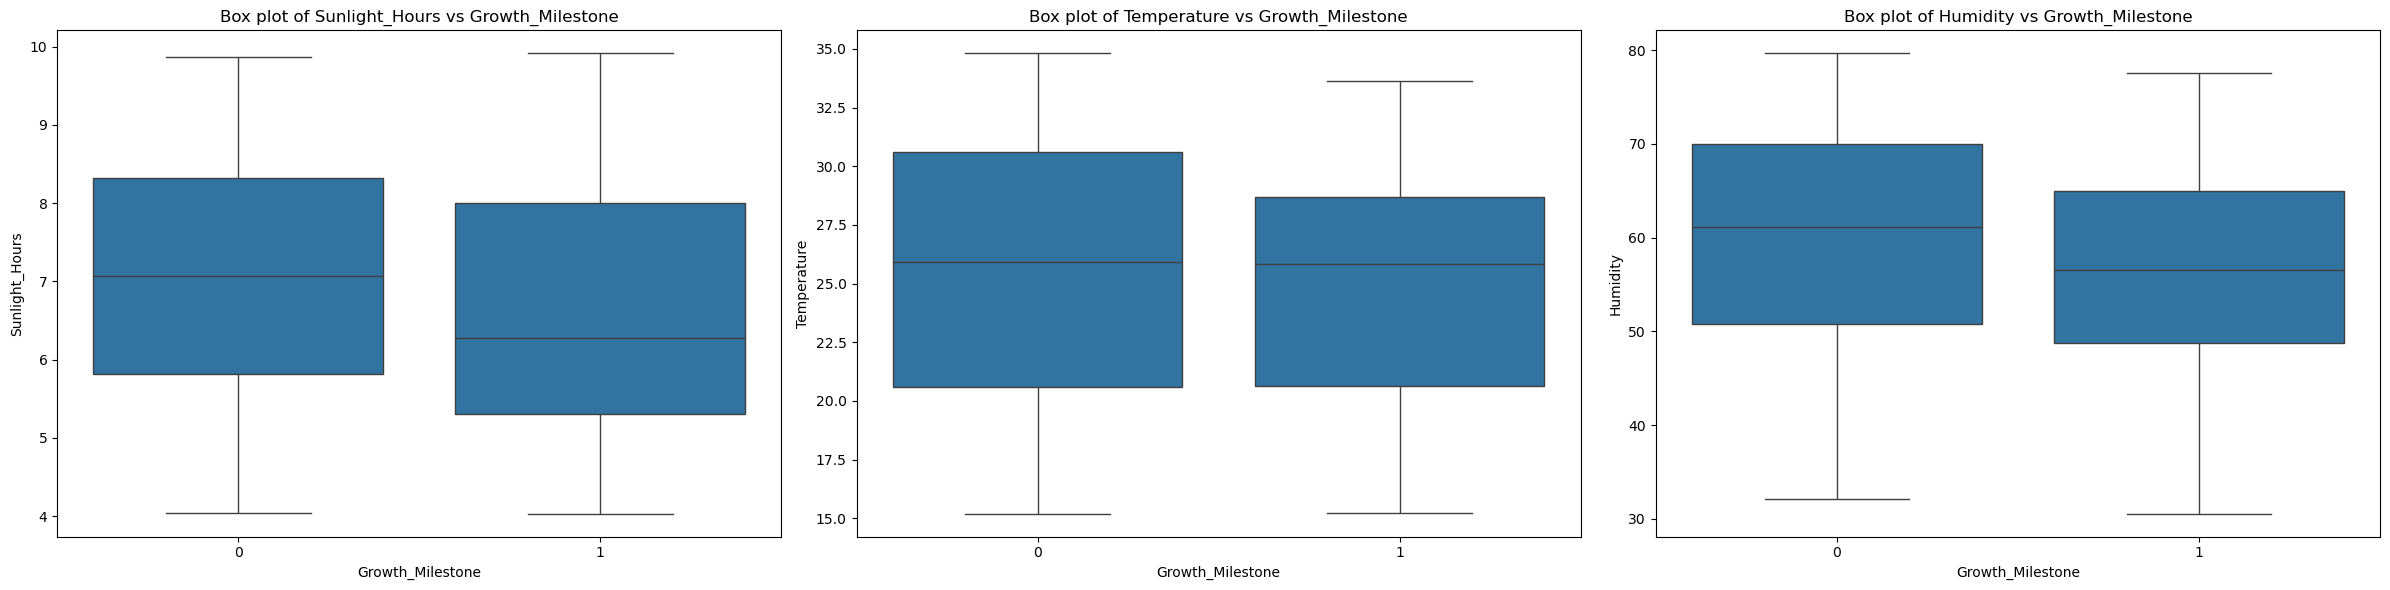

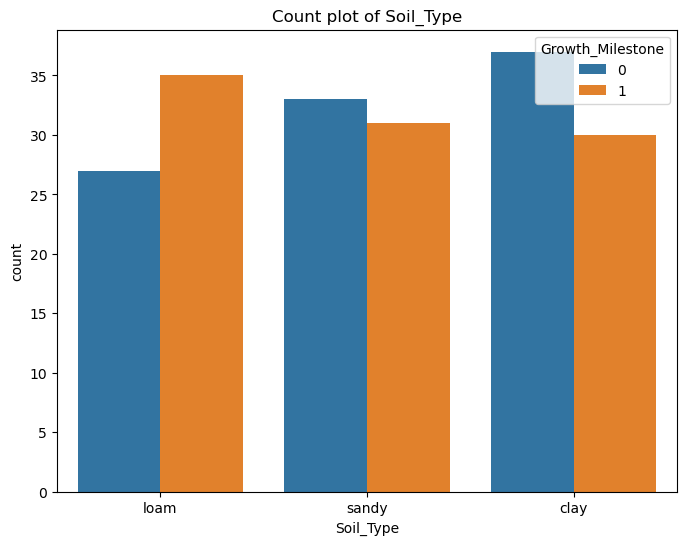

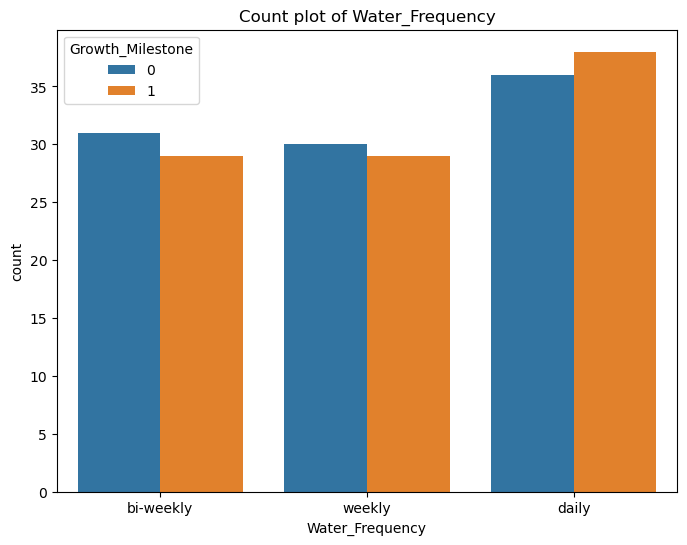

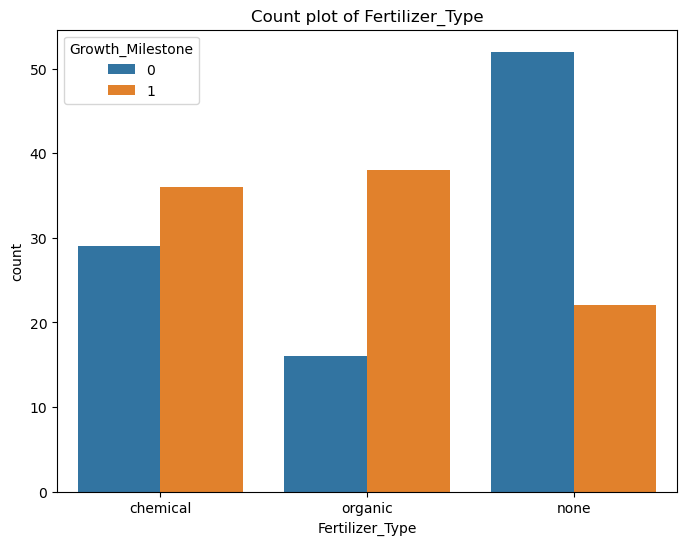

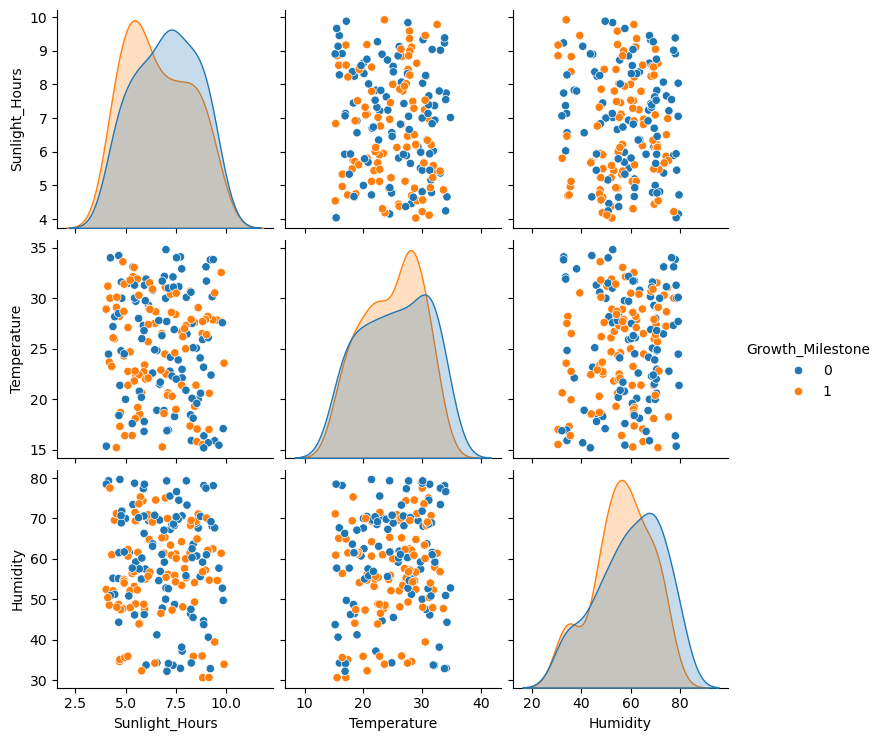

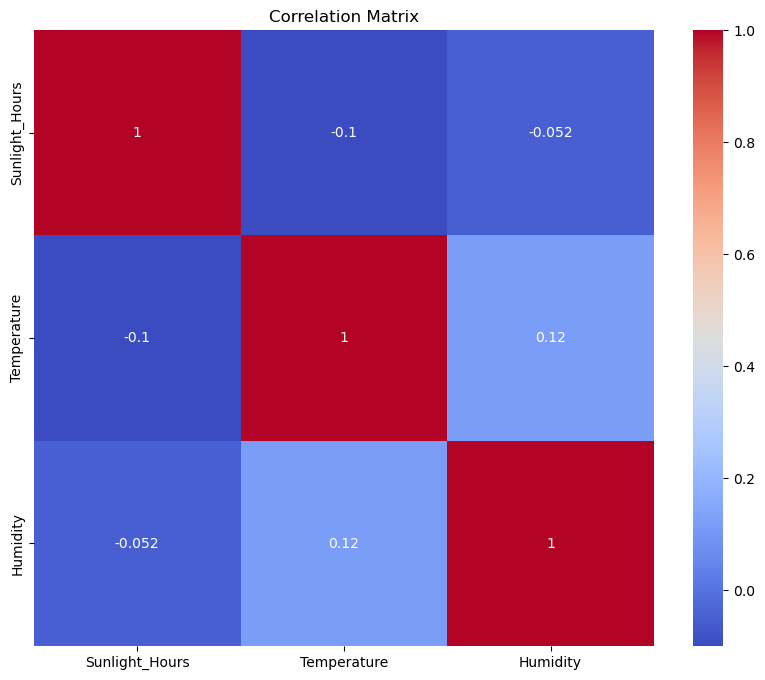

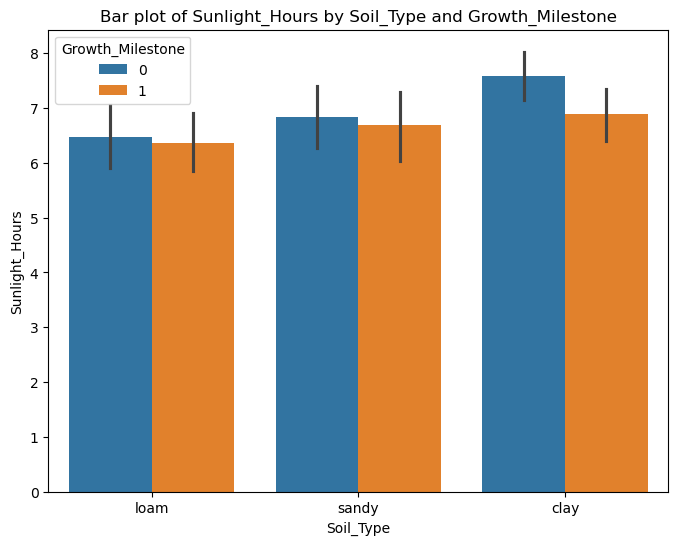

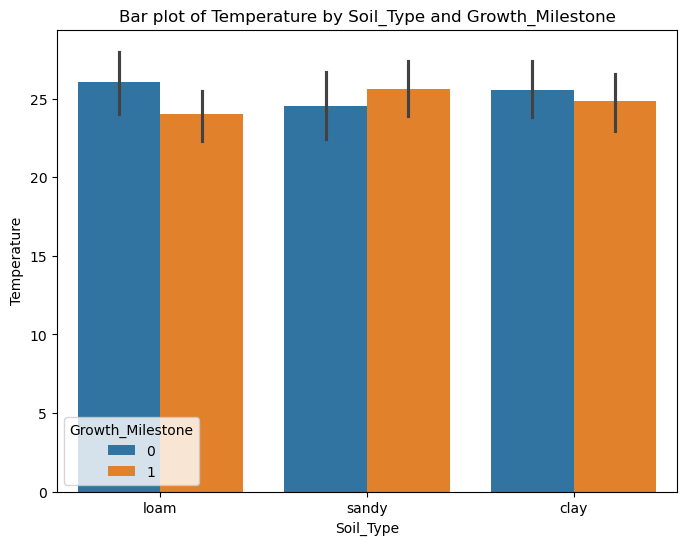

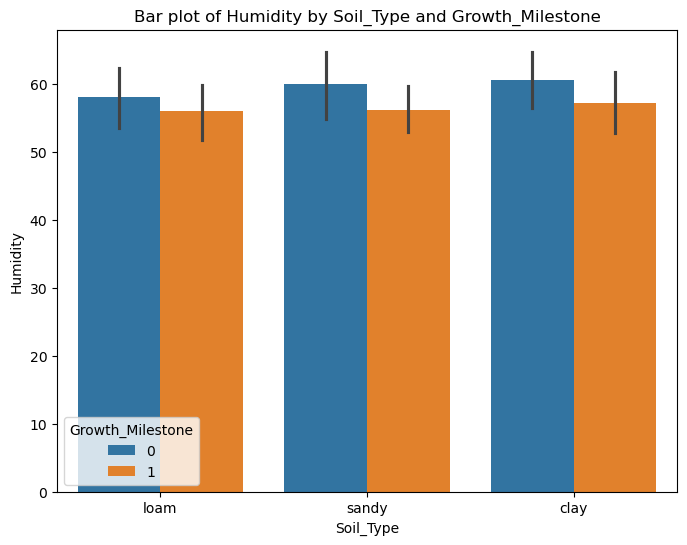

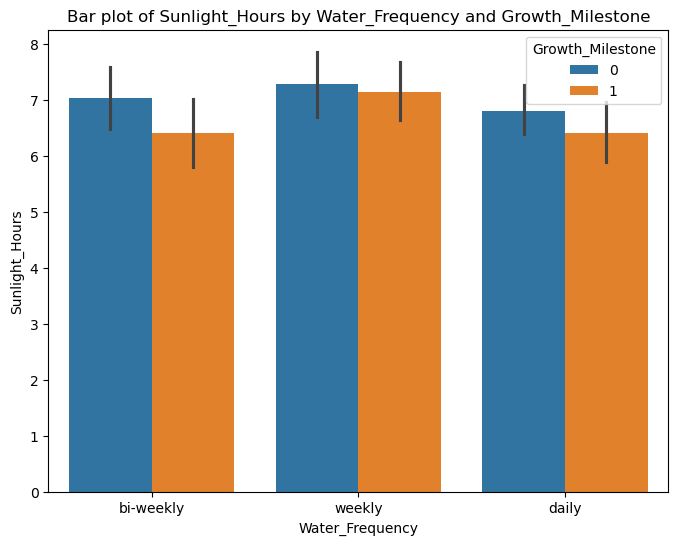

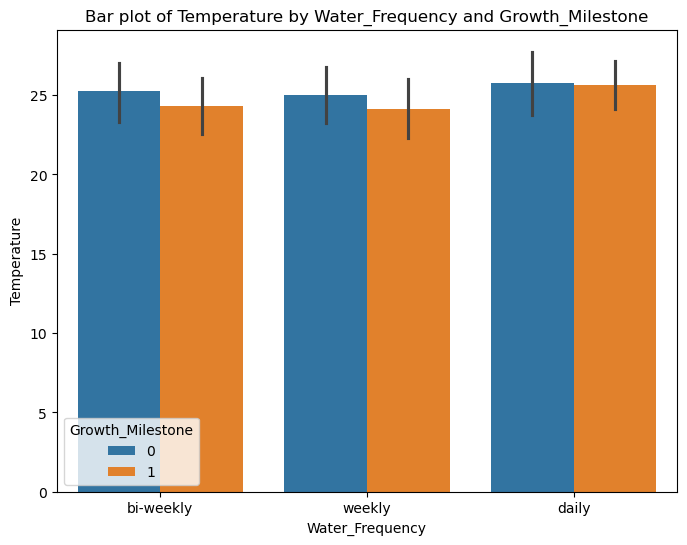

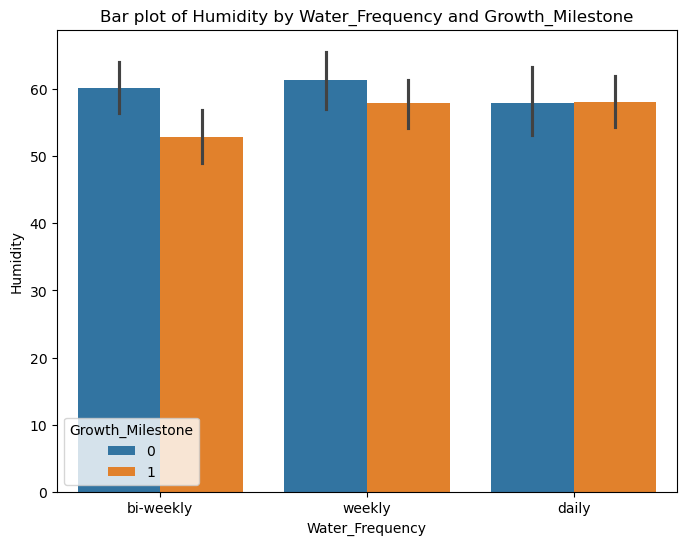

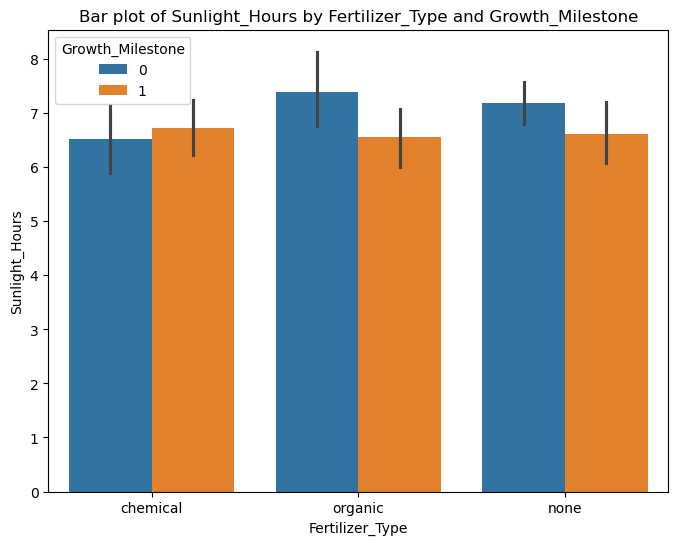

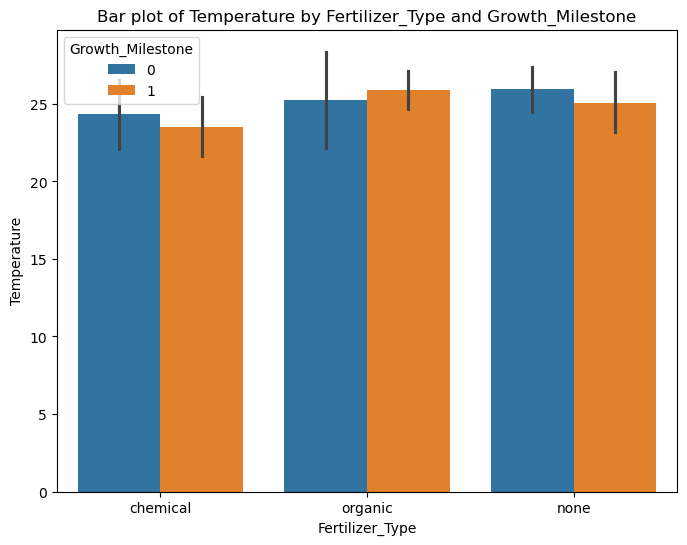

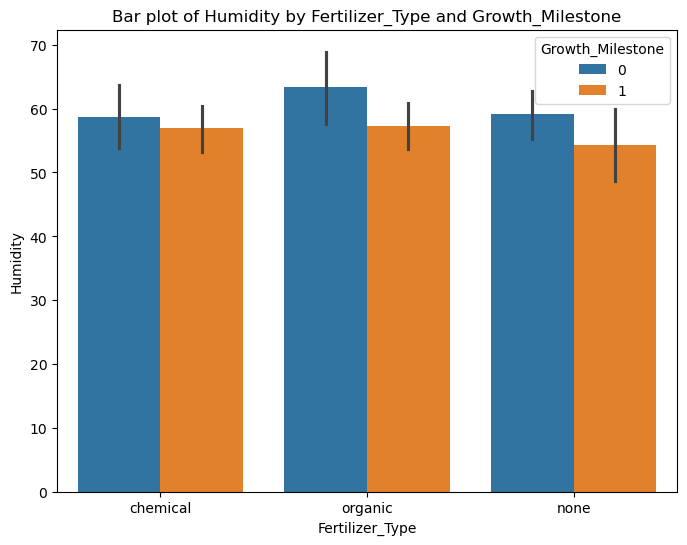

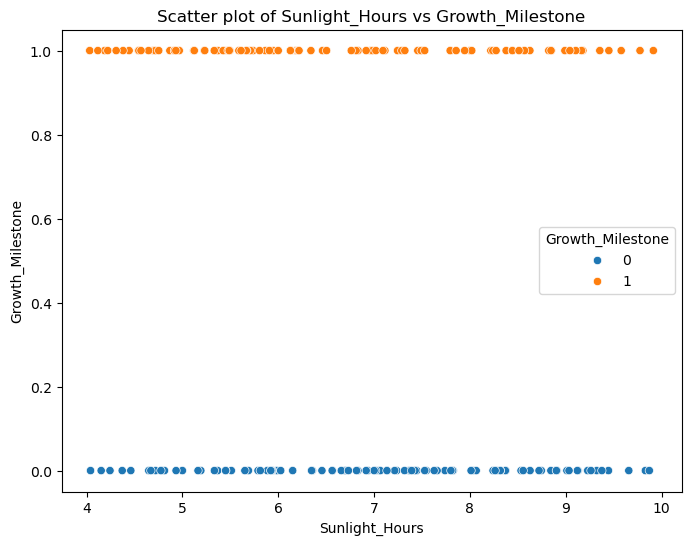

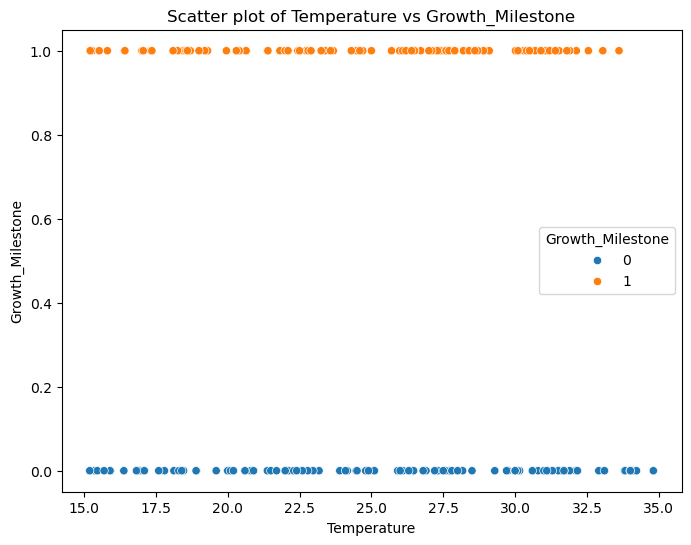

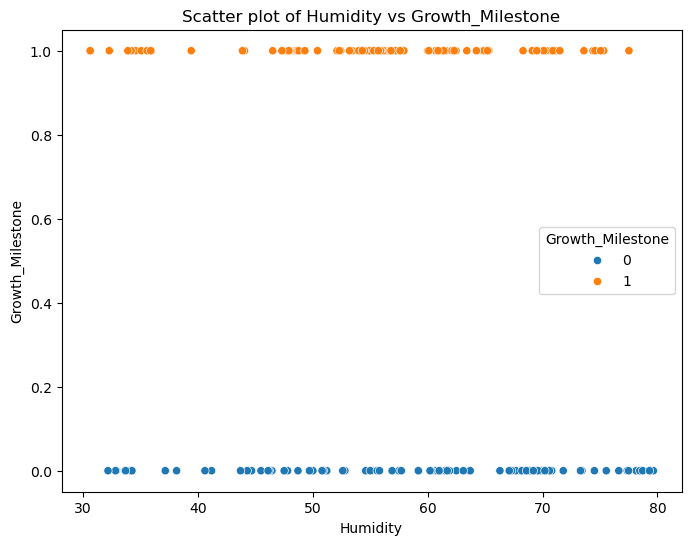

In [5]:
# Histograms
numerical_cols = ['Sunlight_Hours', 'Temperature', 'Humidity']
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

# Box plots
# for col in numerical_cols:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x='Growth_Milestone', y=col, data=df)
#     plt.title(f'Box plot of {col} vs Growth_Milestone')
#     plt.show()

# Determine the number of columns and rows
num_cols = 3
num_plots = len(numerical_cols)
num_rows = (num_plots + num_cols - 1) // num_cols  # This ensures enough rows

# Adjust the figsize to maintain the 8x6 size for each subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x='Growth_Milestone', y=col, data=df, ax=ax)
    ax.set_title(f'Box plot of {col} vs Growth_Milestone')

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


# Count plots
categorical_cols = ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Growth_Milestone', data=df)
    plt.title(f'Count plot of {col}')
    plt.show()

# Pair plots
sns.pairplot(df, hue='Growth_Milestone', vars=numerical_cols)
plt.show()

# Correlation matrix
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Bar plots
for col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=col, y=num_col, hue='Growth_Milestone', data=df)
        plt.title(f'Bar plot of {num_col} by {col} and Growth_Milestone')
        plt.show()

# Scatter plots
for num_col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=num_col, y='Growth_Milestone', data=df, hue='Growth_Milestone')
    plt.title(f'Scatter plot of {num_col} vs Growth_Milestone')
    plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 0] = label_encoder.fit_transform(X.iloc[:, 0])
X

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
0,1,5.192294,bi-weekly,chemical,31.719602,61.591861
1,2,4.033133,weekly,organic,28.919484,52.422276
2,1,8.892769,bi-weekly,none,23.179059,44.660539
3,1,8.241144,bi-weekly,none,18.465886,46.433227
4,2,8.374043,bi-weekly,organic,18.128741,63.625923
...,...,...,...,...,...,...
188,2,5.652000,daily,none,28.000000,70.200000
189,0,7.528000,weekly,chemical,30.500000,60.100000
190,1,4.934000,bi-weekly,none,24.500000,61.700000
191,2,8.273000,daily,organic,27.900000,69.500000


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Argument should be categorial data feild


# Country column
# Assuming X is your dataset
# Define the ColumnTransformer with OneHotEncoder for the first column (index 0)
ct = ColumnTransformer(
    transformers=[
        ('soil', OneHotEncoder(drop='first'), [0])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 5.192294089205035, ..., 'chemical', 31.71960241024412,
        61.59186060848997],
       [0.0, 1.0, 4.033132702741614, ..., 'organic', 28.91948412187396,
        52.42227609891599],
       [1.0, 0.0, 8.892768570729004, ..., 'none', 23.1790588882854,
        44.66053858490323],
       ...,
       [1.0, 0.0, 4.934, ..., 'none', 24.5, 61.7],
       [0.0, 1.0, 8.273, ..., 'organic', 27.9, 69.5],
       [0.0, 0.0, 6.732, ..., 'none', 21.7, 56.9]], dtype=object)

In [5]:
X[:, 3] = label_encoder.fit_transform(X[:, 3])
X

array([[1.0, 0.0, 5.192294089205035, ..., 'chemical', 31.71960241024412,
        61.59186060848997],
       [0.0, 1.0, 4.033132702741614, ..., 'organic', 28.91948412187396,
        52.42227609891599],
       [1.0, 0.0, 8.892768570729004, ..., 'none', 23.1790588882854,
        44.66053858490323],
       ...,
       [1.0, 0.0, 4.934, ..., 'none', 24.5, 61.7],
       [0.0, 1.0, 8.273, ..., 'organic', 27.9, 69.5],
       [0.0, 0.0, 6.732, ..., 'none', 21.7, 56.9]], dtype=object)

In [6]:

ct = ColumnTransformer(
    transformers=[
        ('water_frequency', OneHotEncoder(drop='first'), [3])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, ..., 'chemical', 31.71960241024412,
        61.59186060848997],
       [0.0, 1.0, 0.0, ..., 'organic', 28.91948412187396,
        52.42227609891599],
       [0.0, 0.0, 1.0, ..., 'none', 23.1790588882854, 44.66053858490323],
       ...,
       [0.0, 0.0, 1.0, ..., 'none', 24.5, 61.7],
       [1.0, 0.0, 0.0, ..., 'organic', 27.9, 69.5],
       [0.0, 1.0, 0.0, ..., 'none', 21.7, 56.9]], dtype=object)

In [7]:
X[:, 5] = label_encoder.fit_transform(X[:, 5])
X

array([[0.0, 0.0, 1.0, ..., 0, 31.71960241024412, 61.59186060848997],
       [0.0, 1.0, 0.0, ..., 2, 28.91948412187396, 52.42227609891599],
       [0.0, 0.0, 1.0, ..., 1, 23.1790588882854, 44.66053858490323],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 24.5, 61.7],
       [1.0, 0.0, 0.0, ..., 2, 27.9, 69.5],
       [0.0, 1.0, 0.0, ..., 1, 21.7, 56.9]], dtype=object)

In [8]:

ct = ColumnTransformer(
    transformers=[
        ('fertilizer_type', OneHotEncoder(drop='first'), [5])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 0.0, ..., 5.192294089205035, 31.71960241024412,
        61.59186060848997],
       [0.0, 1.0, 0.0, ..., 4.033132702741614, 28.91948412187396,
        52.42227609891599],
       [1.0, 0.0, 0.0, ..., 8.892768570729004, 23.1790588882854,
        44.66053858490323],
       ...,
       [1.0, 0.0, 0.0, ..., 4.934, 24.5, 61.7],
       [0.0, 1.0, 1.0, ..., 8.273, 27.9, 69.5],
       [1.0, 0.0, 0.0, ..., 6.732, 21.7, 56.9]], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Will only scale X

In [30]:
from sklearn.neighbors import KNeighborsClassifier  # NON-Linear
classifier = KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [31]:
Y_pred=classifier.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

# Accuracy Check

In [32]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
print(r2)

-0.5394736842105261


## Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix # Function not class
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[15,  5],
       [10,  9]])